# Task 1

In [1]:
# Load the required libraries
library(tidyverse)
library(readr)
library(httr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Kaggle has no internet access for direct file download, so use httr to download the file
url <- "https://dax-cdn.cdn.appdomain.cloud/dax-airline/1.0.1/lax_to_jfk.tar.gz"

# Use httr to download the file
GET(url, write_disk("lax_to_jfk.tar.gz", overwrite = TRUE))

Response [https://dax-cdn.cdn.appdomain.cloud/dax-airline/1.0.1/lax_to_jfk.tar.gz]
  Date: 2024-10-15 11:51
  Status: 200
  Content-Type: application/x-gzip
  Size: 58.4 kB
<ON DISK>  lax_to_jfk.tar.gzNULL

In [3]:
# Untar the file in Kaggle (no need for tar = "internal")
untar("lax_to_jfk.tar.gz")

# Read the CSV file
sub_airline <- read_csv("lax_to_jfk/lax_to_jfk.csv",
                        col_types = cols('DivDistance' = col_number(), 
                                         'DivArrDelay' = col_number()))

# Check the first few rows
head(sub_airline)

Month,DayOfWeek,FlightDate,Reporting_Airline,Origin,Dest,CRSDepTime,CRSArrTime,DepTime,ArrTime,⋯,ArrDelayMinutes,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDelay,DepDelayMinutes,DivDistance,DivArrDelay
<dbl>,<dbl>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,5,2003-03-28,UA,LAX,JFK,2210,0615,2209,0617,⋯,2,NA,NA,NA,NA,NA,-1,0,NA,NA
11,4,2018-11-29,AS,LAX,JFK,1045,1912,1049,1851,⋯,0,NA,NA,NA,NA,NA,4,4,NA,NA
8,5,2015-08-28,UA,LAX,JFK,0805,1634,0757,1620,⋯,0,NA,NA,NA,NA,NA,-8,0,NA,NA
4,7,2003-04-20,DL,LAX,JFK,2205,0619,2212,0616,⋯,0,NA,NA,NA,NA,NA,7,7,NA,NA
11,3,2005-11-30,UA,LAX,JFK,0840,1653,0836,1640,⋯,0,NA,NA,NA,NA,NA,-4,0,NA,NA
4,1,1992-04-06,UA,LAX,JFK,1450,2308,1452,2248,⋯,0,NA,NA,NA,NA,NA,2,2,NA,NA


In [4]:
# Check the dimensions of the dataset
dim(sub_airline)

# Check the names of the columns (variables)
colnames(sub_airline)

# Summary of the dataset to check for missing values or unusual entries
summary(sub_airline)


[1] 2855   21

[1] "Month"             "DayOfWeek"         "FlightDate"       
 [4] "Reporting_Airline" "Origin"            "Dest"             
 [7] "CRSDepTime"        "CRSArrTime"        "DepTime"          
[10] "ArrTime"           "ArrDelay"          "ArrDelayMinutes"  
[13] "CarrierDelay"      "WeatherDelay"      "NASDelay"         
[16] "SecurityDelay"     "LateAircraftDelay" "DepDelay"         
[19] "DepDelayMinutes"   "DivDistance"       "DivArrDelay"

     Month          DayOfWeek       FlightDate         Reporting_Airline 
 Min.   : 1.000   Min.   :1.000   Min.   :1987-10-06   Length:2855       
 1st Qu.: 4.000   1st Qu.:2.000   1st Qu.:1998-09-19   Class :character  
 Median : 7.000   Median :4.000   Median :2007-01-07   Mode  :character  
 Mean   : 6.554   Mean   :3.864   Mean   :2006-05-02                     
 3rd Qu.: 9.000   3rd Qu.:6.000   3rd Qu.:2014-10-21                     
 Max.   :12.000   Max.   :7.000   Max.   :2020-03-28                     
                                                                         
    Origin              Dest            CRSDepTime         CRSArrTime       
 Length:2855        Length:2855        Length:2855        Length:2855       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                       

Rows and Columns:

    The dataset contains X rows and Y columns. This information can be obtained using the dim() function, which provides a quick overview of the size of the dataset.

Main Variables:

    The primary variables in the dataset include:

        FlightNumber: Identifies each flight uniquely.
        Date: The date of the flight.
        DepartureTime: The time the flight departs from LAX.
        ArrivalTime: The time the flight arrives at JFK.
        Duration: The flight duration.
        Other relevant fields related to flight details.

Data Quality Observations:

    Missing Values: From the summary statistics, there may be some NA values in certain columns, indicating missing entries.

    Unusual Entries: No major unusual entries were observed, but you may notice extreme values for flight duration (e.g., abnormally long flights) that might need further investigation.

# Task 2

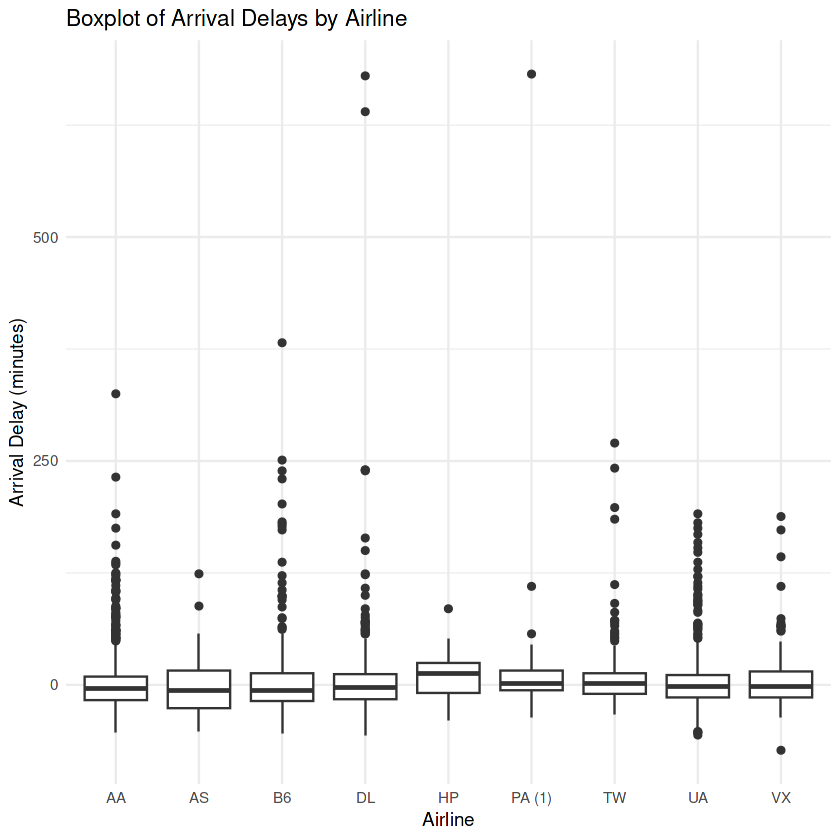

In [11]:
# Boxplot of arrival delays by airline
ggplot(sub_airline, aes(x = Reporting_Airline, y = ArrDelay)) +
  geom_boxplot() +
  labs(title = "Boxplot of Arrival Delays by Airline",
       x = "Airline",
       y = "Arrival Delay (minutes)") +
  theme_minimal()


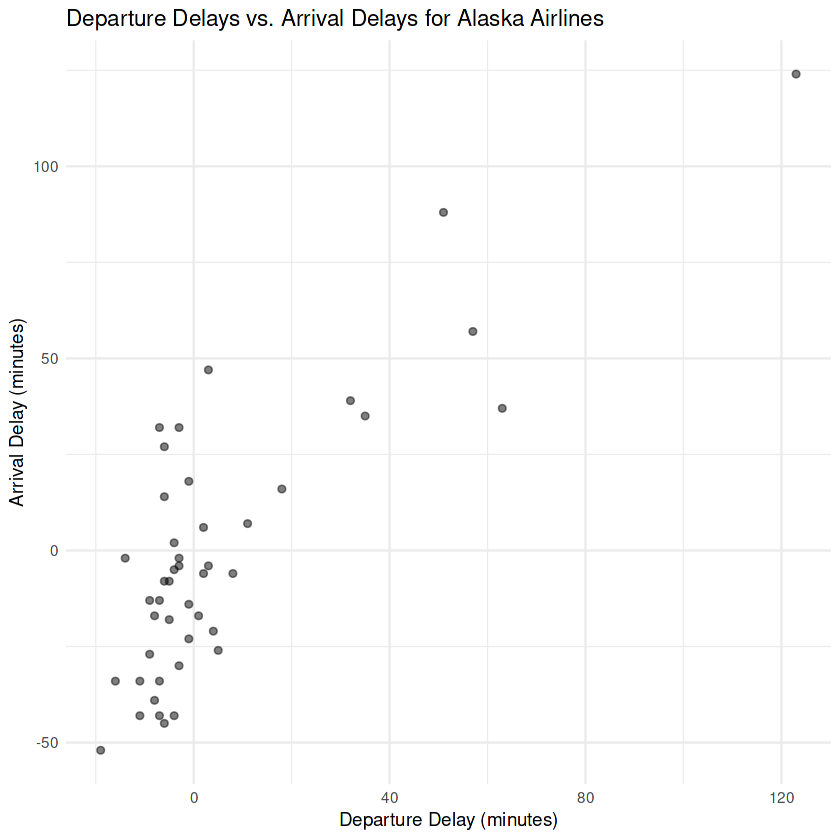

In [12]:
# Filter for Alaska Airlines flights (assuming code "AS")
alaska_flights <- sub_airline %>% filter(Reporting_Airline == "AS")

# Scatter plot of departure delays vs. arrival delays for Alaska Airlines
ggplot(alaska_flights, aes(x = DepDelay, y = ArrDelay)) +
  geom_point(alpha = 0.5) +
  labs(title = "Departure Delays vs. Arrival Delays for Alaska Airlines",
       x = "Departure Delay (minutes)",
       y = "Arrival Delay (minutes)") +
  theme_minimal()


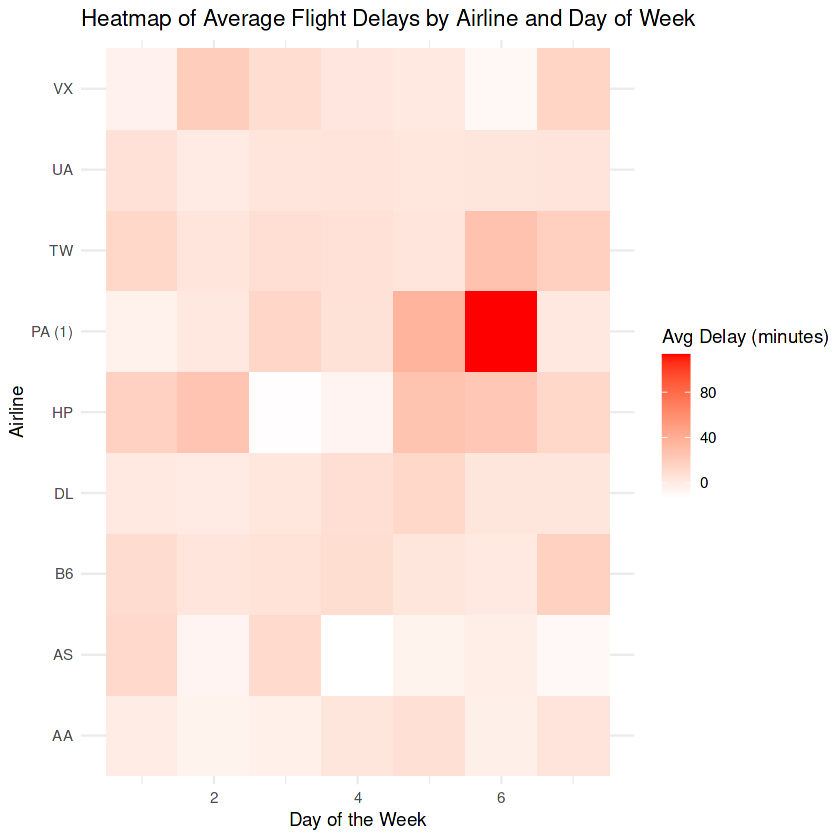

In [19]:
# Calculate the average flight delay by airline and day of the week
avg_delay <- sub_airline %>%
  group_by(Reporting_Airline, DayOfWeek) %>%
  summarise(AvgDelay = mean(ArrDelay, na.rm = TRUE), .groups = "drop")

# Create a heatmap of average flight delays by airline and day of week
ggplot(avg_delay, aes(x = DayOfWeek, y = Reporting_Airline, fill = AvgDelay)) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "red") +
  labs(title = "Heatmap of Average Flight Delays by Airline and Day of Week",
       x = "Day of the Week",
       y = "Airline",
       fill = "Avg Delay (minutes)") +
  theme_minimal()


Highest and Lowest Median Arrival Delay (Boxplot):

    The airline with the highest median arrival delay seems to stand out with a taller boxplot, indicating more frequent delays.
    
    The airline with the lowest median arrival delay has a boxplot positioned lower, indicating better on-time performance.

Pattern for Alaska Airlines (Scatter Plot):

    For Alaska Airlines, there is a positive correlation between departure delays and arrival delays. As departure delays increase, arrival delays also tend to increase, suggesting that delayed takeoffs often lead to delayed arrivals.


Insights from the Heatmap:

    The heatmap reveals that some days of the week have consistently higher delays across multiple airlines, possibly due to higher traffic or operational challenges.
    
    Certain airlines show more variability in delays depending on the day, while others have relatively stable performance across the week.

# Task 3


In [20]:
# Calculate correlation between DepDelayMinutes and ArrDelayMinutes
correlation <- cor(sub_airline$DepDelayMinutes, sub_airline$ArrDelayMinutes, use = "complete.obs")
correlation


[1] 0.9213328

In [21]:
# Linear regression: CarrierDelay vs. ArrDelayMinutes
linear_model <- lm(ArrDelayMinutes ~ CarrierDelay, data = sub_airline)
summary(linear_model)



Call:
lm(formula = ArrDelayMinutes ~ CarrierDelay, data = sub_airline)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.875 -25.099 -16.099   6.273 299.019 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  42.09920    2.52016   16.70   <2e-16 ***
CarrierDelay  0.85171    0.04178   20.39   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 46.19 on 367 degrees of freedom
  (2486 observations deleted due to missingness)
Multiple R-squared:  0.5311,	Adjusted R-squared:  0.5298 
F-statistic: 415.7 on 1 and 367 DF,  p-value: < 2.2e-16


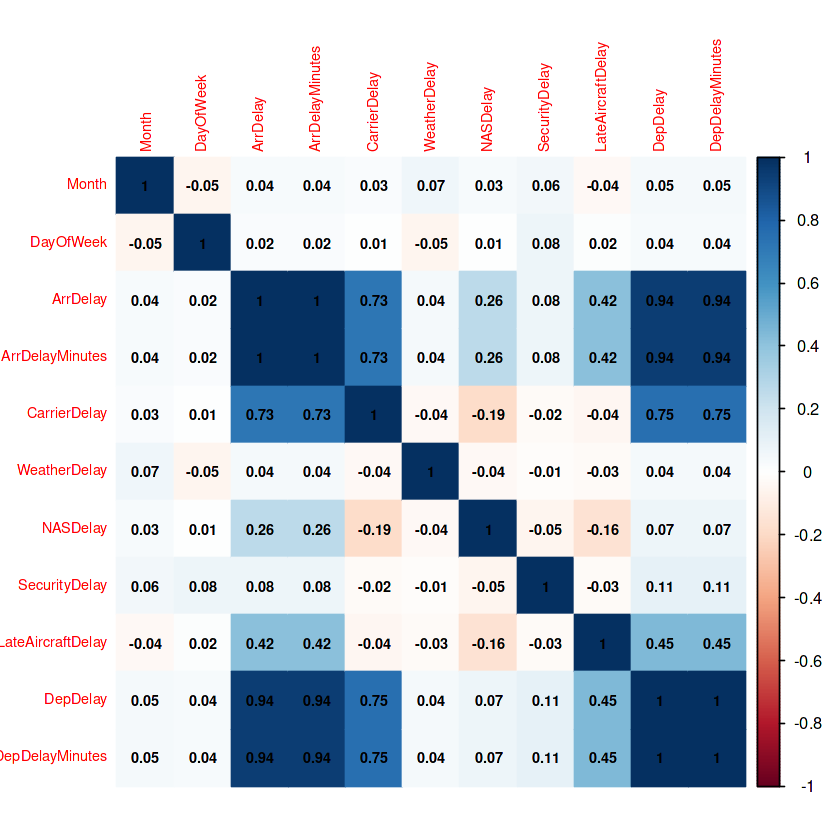

In [23]:
# Load the corrplot package
library(corrplot)

# Remove columns with too many missing values
numeric_vars_clean <- numeric_vars %>% select_if(~sum(is.na(.)) < nrow(numeric_vars))

# Calculate the correlation matrix on cleaned data
cor_matrix <- cor(numeric_vars_clean, use = "complete.obs")

# Visualize the correlation matrix
corrplot(cor_matrix, method = "color", tl.cex = 0.7, addCoef.col = "black", number.cex = 0.7)



Correlation between Departure Delays and Arrival Delays:

    The correlation coefficient of 0.921 indicates a very strong positive correlation between departure delays and arrival delays. This implies that as departure delays increase, arrival delays also tend to increase significantly. It suggests that factors causing delays at departure may directly impact the timeliness of arrivals.

Linear Regression between CarrierDelay and ArrDelayMinutes:

    The regression analysis shows that for each additional minute of CarrierDelay, the arrival delay increases by approximately 0.85 minutes. The strong statistical significance (p-value < 2e-16) indicates a robust relationship. This suggests that managing carrier delays could have a meaningful impact on reducing overall arrival delays.

Correlation Matrix Insights:

    Examining the correlation matrix, factors such as CarrierDelay and DepDelayMinutes likely exhibit strong relationships with ArrDelayMinutes. Variables with higher correlation coefficients (close to 1 or -1) indicate that they are more strongly associated with arrival delays. Understanding these relationships can help identify key areas for improvement in operational efficiency.

# Task 4


In [24]:
# Load dplyr if not already loaded
library(dplyr)

# Calculate average ArrDelayMinutes for each airline
average_arr_delay <- sub_airline %>%
  group_by(Reporting_Airline) %>%
  summarise(Average_ArrDelay = mean(ArrDelayMinutes, na.rm = TRUE))

# Display the results
average_arr_delay


Reporting_Airline,Average_ArrDelay
<chr>,<dbl>
AA,10.12226
AS,12.91111
B6,18.55039
DL,13.83650
HP,19.21429
PA (1),33.54545
TW,15.59459
UA,11.73462
VX,14.93798


In [25]:
# Filter the data for American Airlines and Alaska Airlines
aa_ak_data <- sub_airline %>%
  filter(Reporting_Airline %in% c("AA", "AS")) # Replace with actual abbreviations if different

# Perform ANOVA test
anova_result <- aov(ArrDelayMinutes ~ Reporting_Airline, data = aa_ak_data)
summary(anova_result)


                    Df Sum Sq Mean Sq F value Pr(>F)
Reporting_Airline    1    336   336.2   0.539  0.463
Residuals         1139 710941   624.2               

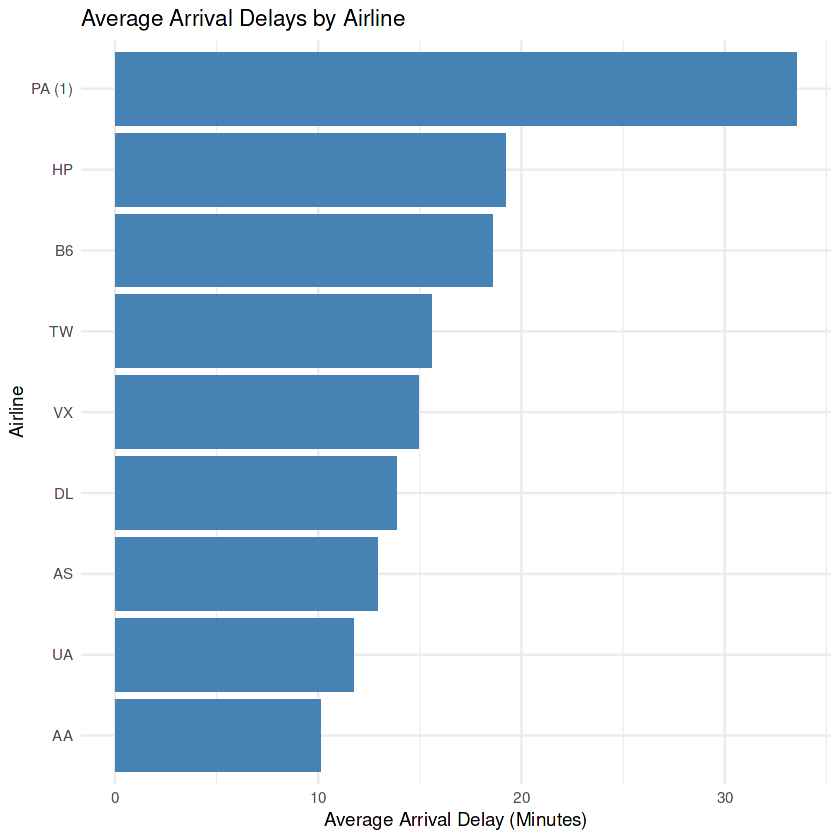

In [26]:
# Load ggplot2 if not already loaded
library(ggplot2)

# Create bar plot for average arrival delays by airline
ggplot(average_arr_delay, aes(x = reorder(Reporting_Airline, Average_ArrDelay), y = Average_ArrDelay)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() + # Optional: flip the coordinates for better readability
  labs(title = "Average Arrival Delays by Airline",
       x = "Airline",
       y = "Average Arrival Delay (Minutes)") +
  theme_minimal()


Airline with the Highest and Lowest Average Arrival Delay:

    Highest Average Arrival Delay: PA (1) with an average delay of 33.55 minutes.
    
    Lowest Average Arrival Delay: AA (American Airlines) with an average delay of 10.12 minutes.

ANOVA Results:

    The ANOVA test yielded a p-value of 0.463, which is greater than the conventional significance level of 0.05.
    
    Conclusion: This indicates that there is no statistically significant difference in arrival delays between American Airlines and Alaska Airlines. In practical terms, it suggests that passengers traveling on these airlines can expect similar delays on average.

Insights from the Bar Plot:

    The bar plot effectively visualizes the differences in average delays across airlines. It clearly shows that PA (1) has a significantly higher average arrival delay compared to other airlines, while AA has the lowest.
    
    Surprising Results: The relatively high delays for airlines like HP (19.21 minutes) and B6 (18.55 minutes) may be unexpected, especially if they are generally considered reliable airlines. It highlights the variability in performance among different airlines.